# 分類樹

決策樹模型就像是一棵樹，由樹根、樹幹到樹葉般地開枝散葉。而每個節點的部分，都是一個特徵。根據特徵一步又一步的細分，將得到餐廳是否值得等待的資訊。而這整棵樹所包含的決策流程，就是所謂的決策樹模型。

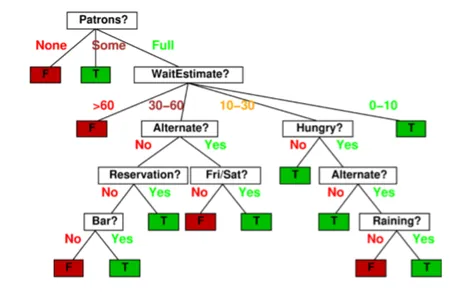

Entropy: 不確定性的量度。Entropy=0為最穩定的狀態，Entropy=1為最混亂無序的狀態。

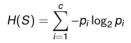


資訊增益(Information Gain): 不同狀態Entropy的差值。

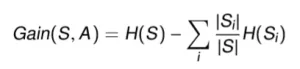

# 算法

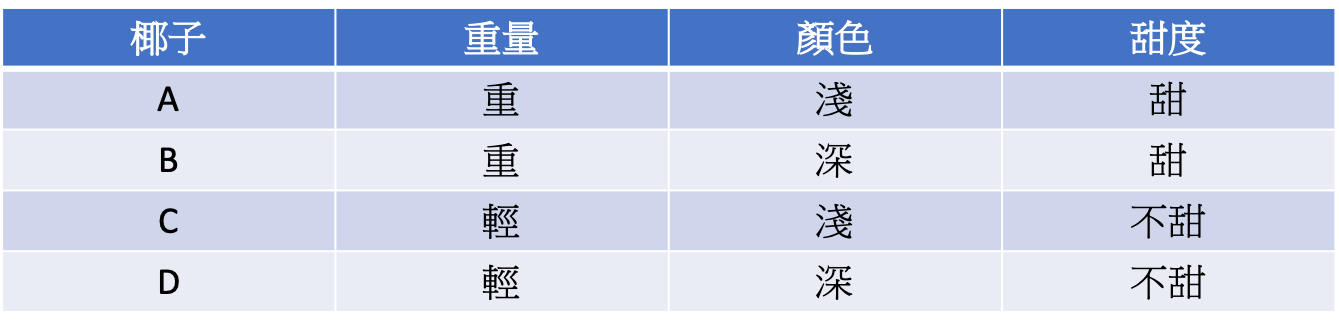

問: 椰子甜不甜
  * P(甜) = 0.5
  * P(不甜) = 0.5
  

**以特徵重量當作區分：**

重的都是甜的，輕的都是不甜的，所以

H(heavy):
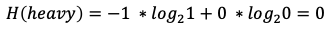


H(light)為:
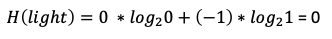

Entropy=0, 也就是最穩定的狀態
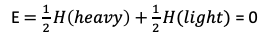

資訊增益:
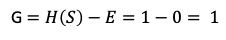

**以顏色重量當作區分：**
顏色淺和顏色深的，都各有一顆甜，一顆不甜,所以

H(dark):
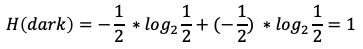

H(light):
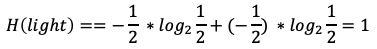  

Entropy=1, 也就是最混亂的狀態
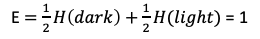

資訊增益:
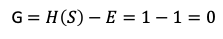

# 輸出

In [19]:
from sklearn import tree
from sklearn import datasets
import pydotplus as pdp
from sklearn.model_selection import train_test_split
import graphviz

In [3]:
iris=datasets.load_iris()

X=iris.data
Y=iris.target

In [17]:
print(f'feature name : {iris.feature_names}')
print(f'target name :{iris.target_names}')

feature name : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target name :['setosa' 'versicolor' 'virginica']


In [4]:
clf=tree.DecisionTreeClassifier(criterion='entropy').fit(X,Y)

In [5]:
clf.score(X,Y)

1.0

In [5]:
dot_data=tree.export_graphviz(clf,out_file=None)
graph=pdp.graph_from_dot_data(dot_data)
graph.write_pdf('iris.pdf')

True

或是直接畫出

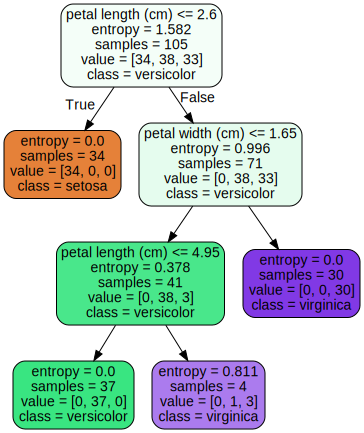

In [20]:
feature_name = [_ for _ in iris.feature_names]
dot_data = tree.export_graphviz(clf
                                ,out_file = None
                                ,feature_names= feature_name
                                ,class_names=[_ for _ in iris.target_names]
                                ,filled=True 
                                ,rounded=True
                                )
graph = graphviz.Source(dot_data)
graph

# 劃分測試集

In [9]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)
clf=tree.DecisionTreeClassifier(criterion='entropy').fit(X_train,Y_train)

In [10]:
clf.score(X_train,Y_train)

1.0

In [11]:
clf.score(X_test,Y_test)

0.9333333333333333

看到測試的Train score為1,Test score卻是稍微下降，推測為overfitting，因此要來做調適

# 調適方法

**max_depth**

限制樹的最大深度，超過設定深度的樹枝全部剪掉 這是用得最廣泛的剪枝參數，在高維度低樣本量時非常有效。決策樹多生長一層，對樣本量的需求會增加一倍，所 以限制樹深度能夠有效地限製過擬合。在集成算法中也非常實用。實際使用時，建議從=3開始嘗試，看看擬合的效 果再決定是否增加設定深度

**min_samples_leaf**

限定一個節點在分枝後的每個子節點都必須包含至少min_samples_leaf個訓練樣本，否則分 枝就不會發生，或者，分枝會朝著滿足每個子節點都包含min_samples_leaf個樣本的方向去發生

**min_samples_split**

限定一個節點必須要包含至少min_samples_split個訓練樣本，這個節點才允許被分枝，否則 分枝就不會發生

註: 輸入random，決策樹在分枝時會更加隨機，樹會因為含有有更多的不必要信息而更深更大，並因這些不必要信息而降低對訓練集的擬合。

In [29]:
#max_depth
clf=tree.DecisionTreeClassifier(criterion='entropy'
                                ,random_state=12
                                ,splitter="random"
                                ,max_depth=3).fit(X_train,Y_train)

print(f'train score:{clf.score(X_train,Y_train)}')
print(f'test score :{clf.score(X_test,Y_test)}')

train score:0.9333333333333333
test score :0.9777777777777777


In [34]:
#min_samples_leaf
clf=tree.DecisionTreeClassifier(criterion='entropy'
                                ,random_state=12
                                ,splitter="random"
                                ,min_samples_leaf=5).fit(X_train,Y_train)

print(f'train score:{clf.score(X_train,Y_train)}')
print(f'test score :{clf.score(X_test,Y_test)}')

train score:0.9428571428571428
test score :0.9777777777777777


In [37]:
#min_samples_leaf
clf=tree.DecisionTreeClassifier(criterion='entropy'
                                ,random_state=12
                                ,splitter="random"
                                ,min_samples_split=5).fit(X_train,Y_train)

print(f'train score:{clf.score(X_train,Y_train)}')
print(f'test score :{clf.score(X_test,Y_test)}')

train score:0.9809523809523809
test score :0.9777777777777777


In [43]:
#當然一起用也是可以
clf=tree.DecisionTreeClassifier(criterion='entropy'
                                ,random_state=12
                                ,splitter="random"
                                ,min_samples_leaf=5
                                ,max_depth=4
                                ,min_samples_split=5).fit(X_train,Y_train)

print(f'train score:{clf.score(X_train,Y_train)}')
print(f'test score :{clf.score(X_test,Y_test)}')

train score:0.9333333333333333
test score :0.9777777777777777


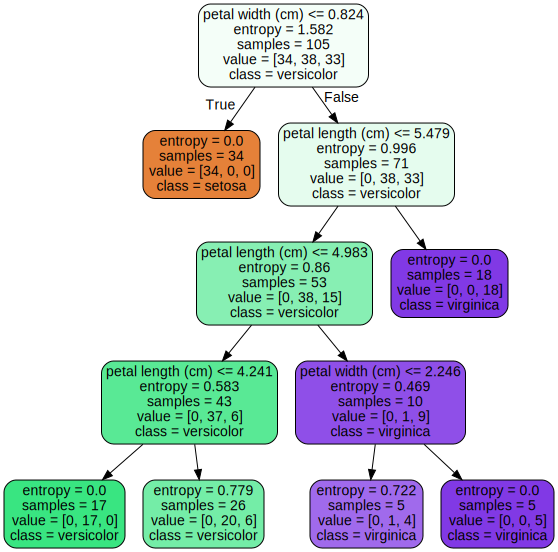

In [44]:
feature_name = [_ for _ in iris.feature_names]
dot_data = tree.export_graphviz(clf
                                ,out_file = None
                                ,feature_names= feature_name
                                ,class_names=[_ for _ in iris.target_names]
                                ,filled=True 
                                ,rounded=True
                                )
graph = graphviz.Source(dot_data)
graph

可以看出樹長得更大棵了

In [22]:
#查看重要特徵性
clf.feature_importances_
[*zip(feature_name,clf.feature_importances_)]

[('sepal length (cm)', 0.0),
 ('sepal width (cm)', 0.0),
 ('petal length (cm)', 0.07513251690198193),
 ('petal width (cm)', 0.924867483098018)]

看得出決策數中只有petal length和petal width兩個特徵有被使用到

# 尋找最優剪枝 

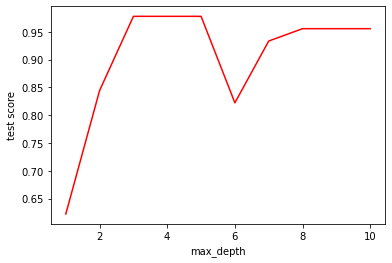

In [48]:
import matplotlib.pyplot as plt

test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                      ,criterion="entropy"
                                      ,random_state=12
                                      ,splitter="random"
                                     )
    clf = clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    test.append(score)
plt.xlabel('max_depth'), plt.ylabel('test score')
plt.plot(range(1,11),test,color="red")
plt.show()

In [49]:
#return leaf index
clf.apply(X_test)

array([30,  1,  1,  5,  5, 20,  1, 13, 29, 30,  5, 27,  1, 27,  5, 30, 27,
       30, 30, 30, 15,  1,  1,  1,  1,  1,  1, 28, 30,  1, 15, 27,  1, 30,
        1,  1,  1,  5,  5,  1, 30, 28, 30, 15, 28])

In [50]:
#reutrn test sample result
clf.predict(X_test)

array([2, 0, 0, 1, 1, 2, 0, 1, 2, 2, 1, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 0, 2, 0, 0, 0, 1, 1, 0, 2, 2, 2, 1,
       2])